## Isochron Demo

In this lab, we will determine the age of our Earth and Solar System and we will learn how to do a bit of python coding! 

I will provide an example of how to write some code to determine the age of an object using the Rb-Sr decay system and an isochron. Then, you will use your own code to write some code to estimate the age of the Earth using the U-Pb decay system. 

All the code and math are the same, you will just need to replace the data and variables like the half life and decay constant!

#### Setup

We are going to start by importing a couple of important modules -- numpy (for making some calculations) and matplotlib (for making graphs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

And then we need to define some variables so that our graphs look nice. This block of code below just changes the defaults-- dont wory about it too much.
(I am picky about graphs. I think these look nice, but if you can improve them, there might be some extra credit for you...)

In [4]:
# ──────────────────────────────────────────────────────────────
# global style
# ──────────────────────────────────────────────────────────────
plt.rcParams.update({
    "axes.titlelocation": "left",
    "axes.titlepad": 10,
    "legend.frameon": False,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "axes.grid": True,
    "grid.color": "0.8",
    "grid.linestyle": "-",
    "grid.alpha": 0.25,
    "svg.fonttype": "none",
    "pdf.fonttype": 42,
    "font.family": "Arial",
})


### Guided Isochron Demo — Rb–Sr whole rocks (Montara tonalite, Salinian)

**What you'll learn about Python**
 - Running cells, variables, lists, NumPy arrays
 - Printing
 - Writing your own function
 - Linear regression with `numpy.polyfit`
 - Plotting with Matplotlib
 - Saving figures

**What you'll learn about geochronology**
- Build an Rb–Sr whole-rock isochron: `y = a + m x` (Useful for any single parent isochron)
- Convert slope → age with:  `m = exp(λT) - 1  ⇒  T = ln(1+m)/λ`
- See how the decay constant choice affects age

#### Dataset: USGS Montara tonalite (Kistler & Champion, 2001, OFR 01-453)
We'll use a coherent subset that forms a tidy line.



##### 1) Data as Python lists (then → NumPy arrays)
A *list* is an ordered collection. We'll store each row as a tuple:
`(87Rb/86Sr, 87Sr/86Sr)`.

x_data and y_data are both lists. 

we then convert them to NumPy arrays because that type is more compatible with the NumPy library. 

In [ ]:
# Rb–Sr whole rocks (Montara tonalite, Salinian)
# x = 87Rb/86Sr
# y = 87Sr/86Sr

## This is the isotope data from the paper!
x_data = [
    0.781,
    0.309,
    0.150,
    0.301,
    0.385,
    0.315,
]

y_data = [
    0.70769,
    0.70695,
    0.70663,
    0.70667,
    0.70731,
    0.70720,
]

# Convert to NumPy arrays for math
x = np.array(x_data)
y = np.array(y_data)


If you want to see what the data looks like, you can print it

In [6]:
# Quick print (optional, just to see the data)
print("DATA — Rb–Sr whole rocks (Montara tonalite, Salinian)")
print("{:<10s} {:>12s} {:>14s}".format("Sample", "87Rb/86Sr (x)", "87Sr/86Sr (y)"))

for i in range(len(x_data)):
    print(
        "{:<10s} {:>12.3f} {:>14.5f}".format(
            f"S{i+1}", x_data[i], y_data[i]
        )
    )


DATA — Rb–Sr whole rocks (Montara tonalite, Salinian)
Sample     87Rb/86Sr (x)  87Sr/86Sr (y)
S1                0.781        0.70769
S2                0.309        0.70695
S3                0.150        0.70663
S4                0.301        0.70667
S5                0.385        0.70731
S6                0.315        0.70720


##### 2) Fit the isochron: `y = b + mx`
np.polyfit(x, y, 1) performs an ordinary least squares fit of a degree-1 polynomial (a straight line) to the data, minimizing the sum of squared vertical residuals between observed y and modeled a + m x. 

This is just a line-of-best fit. You have done this before. 

In [7]:
m, a = np.polyfit(x, y, 1)

# This is just to see what the values are.
print("\nSTEP 1 — Linear isochron:  y = a + m x")
print(f"   Slope m = {m:.6f}")
print(f"   Intercept a = {a:.6f}   (≈ initial 87Sr/86Sr)")


STEP 1 — Linear isochron:  y = a + m x
   Slope m = 0.001672
   Intercept a = 0.706450   (≈ initial 87Sr/86Sr)



##### 3) Convert slope → age (Rb–Sr single-parent)
Relation:  `m = exp(λT) − 1`  ⇒  `T = ln(1+m)/λ`

We'll use two λ values to show sensitivity:
- `λ_paper  = 1.402e-11 yr^-1` (common in older papers)
- `λ_modern = 1.3972e-11 yr^-1` (modern recommended)

 **Beginner Python tip:** We'll write a tiny function to compute age from `m` and `λ`.
 (this is kind of silly because it doesnt do very much (it is one line of code), but you can at least see how to write a function if you want).


In [6]:
def rbsr_age_from_slope(m, lam_per_year):
    """Return age in Ma given slope m and decay constant lam (per year)."""
    T_years = np.log1p(m) / lam_per_year
    return T_years / 1e6  # convert to Ma

lam_paper  = 1.402e-11   # yr^-1
lam_modern = 1.3972e-11  # yr^-1

T_paper_Ma  = rbsr_age_from_slope(m, lam_paper)
T_modern_Ma = rbsr_age_from_slope(m, lam_modern)

print("\nSTEP 2 — Age from slope (Rb–Sr single-parent)")
print("   Equation:  m = exp(λ T) − 1   ⇒   T = ln(1 + m)/λ")
print(f"   Using λ_paper  = 1.402×10^-11 yr^-1  →  T ≈ {T_paper_Ma:.1f} Ma")
print(f"   Using λ_modern = 1.3972×10^-11 yr^-1 →  T ≈ {T_modern_Ma:.1f} Ma")


STEP 2 — Age from slope (Rb–Sr single-parent)
   Equation:  m = exp(λ T) − 1   ⇒   T = ln(1 + m)/λ
   Using λ_paper  = 1.402×10^-11 yr^-1  →  T ≈ 119.2 Ma
   Using λ_modern = 1.3972×10^-11 yr^-1 →  T ≈ 119.6 Ma



##### Try it
- Change `lam_paper` a little (e.g., `1.395e-11`) and re-run the cell.
- What happens to the age? Why?

##### 4) Tufte-style plot (minimal ink, direct labels)
 Tips:
 - One figure, no legend. Label points directly.
 - Thin line, no boxy backgrounds.
 - Save PNG/PDF/SVG for your report.

The data for this first example comes from Carlson et al., 2014. 

They used a norite sample returned from the  samples returned from thw Apollo 17 mission to the moon. Norite primarily is composed of plagioclase and pyroxene, so Carlson et al., 2014 measured the Rb/Sr  ratios of individual phases as well as 

In [7]:
# Build best-fit line across x-range (+ small margin)
xx = np.linspace(x.min()*0.95, x.max()*1.05, 200)
yy = a + m*xx

now, lets make a graph

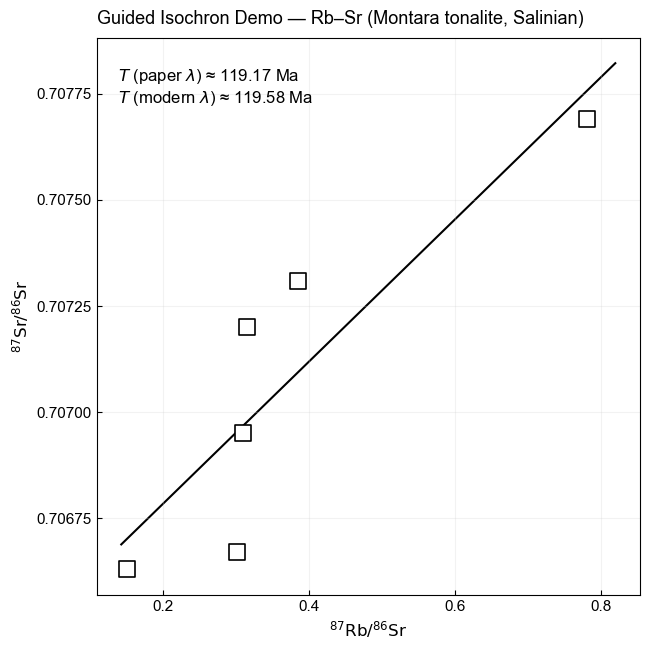

In [8]:
plt.figure(figsize=(6.6, 6.6))
ax = plt.gca()

# Draw the best-fit line FIRST so it sits behind the points
ax.plot(xx, yy, linewidth=1.5, color='k', zorder=1)

# Draw the points AFTER (bigger squares, on top of line)
ax.scatter(
    x, y,
    s=130,                    # ← a bit larger
    marker='s',
    facecolor='white',        # filled white so it masks the line
    edgecolors='k',
    linewidths=1.2,
    zorder=3                  # ← above the line
)

# Minimal axes and title
ax.set_xlabel(r"$^{87}\mathrm{Rb}/^{86}\mathrm{Sr}$", fontsize=12)
ax.set_ylabel(r"$^{87}\mathrm{Sr}/^{86}\mathrm{Sr}$", fontsize=12)
ax.set_title("Guided Isochron Demo — Rb–Sr (Montara tonalite, Salinian)", fontsize=13)
ax.tick_params(axis="both", which="major", labelsize=11)
ax.locator_params(nbins=6)

# Findings text
txt = (
    f"\n$T$ (paper $\\lambda$) ≈ {T_paper_Ma:.2f} Ma"
    f"\n$T$ (modern $\\lambda$) ≈ {T_modern_Ma:.2f} Ma"
)
ax.text(0.04, 0.98, txt, transform=ax.transAxes, va="top", ha="left", fontsize=12)

plt.tight_layout()
plt.savefig("montara_rbsr_isochron_tufte.png", dpi=300)
plt.savefig("montara_rbsr_isochron_tufte.pdf")
plt.savefig("montara_rbsr_isochron_tufte.svg")
plt.show()
